In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
import re

In [2]:

def find_max_number(text):
    # Находим все числа (включая отрицательные и дробные) [[1]][[6]]
    numbers = re.findall(r"[-+]?\d*\.?\d+|\d+", text)
    if not numbers:
        return 0  # Если чисел нет
    # Преобразуем строки в числа и находим максимум [[1]][[9]]
    return max(map(float, numbers))


df = pd.read_excel("https://docs.google.com/spreadsheets/d/1OJiCQptJ8DEgr916EpL-CsrxSsEtKiAK0MV_IyrtdCo/export?format=xlsx")
df.drop(0,axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)

dict_i = {}
for i in ['1. Ваш возраст?', '2. Сколько букв в вашем имени?','11. Напишите число','10. Сколько вы знаете людей, живущих в общежитии?(Напишите число)']:
    dict_i[i] = []
    for _ in df[i].values:
        try:
            dict_i[i].append(int(_))
        except:
            dict_i[i].append(find_max_number(_))
    df[i] = dict_i[i]

df.drop([0,4],axis=0,inplace=True)
df.drop('Отметка времени',axis=1,inplace=True)
df

,1. Ваш возраст?,2. Сколько букв в вашем имени?,3. Ощущаете ли вы себя психологически уравновешанным?,4. Как часто вы посещаете занятия в университете? (по колличеству раз в неделю),5. Сколько времени в среднем вы тратите на домашние задания ежедневно?,"6. Оцените, как вам нравится учиться в университете:",7. Сколько учебников или дополнительных материалов вы использовали за семестр?,8. Пользуетесь ли вы университетскими столовыми?,9. Пользовались ли вы электронно-библиотечной системой университета?,"10. Сколько вы знаете людей, живущих в общежитии?(Напишите число)",11. Напишите число,"12. Вы любите, когда вам говорят пожалуйста и спасибо?","13. Что, по вашем мнению из следующего списка стоит реализовать в университете?",14. Есть ли у вас ноутбук?,15. Откуда вы получаете расписание занятий?
1,19.0,5.0,Нет,10.0,4.0,6.0,1.0,Нет,Нет,3.0,1.841900e+04,Нет,Интернет+Розетки,Да,Сайт
2,20.0,5.0,Да,10.0,2.0,1.0,0.0,Нет,Нет,10.0,8.532000e+03,Нет,Интернет+Розетки,Да,Приложение
3,21.0,7.0,Нет,1.0,1.0,3.0,3.0,Нет,Нет,20.0,5.000000e+01,Да,Интернет+Розетки,Да,Приложение
5,2.0,7.0,Нет,10.0,0.0,5.0,0.0,Нет,Нет,500.0,2.298304e+07,Да,Интернет+Розетки,Да,Сайт
6,19.0,7.0,Нет,4.0,2.0,3.0,0.0,Нет,Да,7.0,5.050000e+03,Да,Интернет+Розетки,Да,Сайт
7,19.0,9.0,Да,10.0,10.0,10.0,2.0,Нет,Да,5.0,0.000000e+00,Да,Интернет+Розетки,Да,Приложение
8,18.0,7.0,Да,8.0,8.0,5.0,3.0,Нет,Да,4.0,9.000000e+00,Да,Интернет+Розетки,Да,Сайт
9,20.0,6.0,Да,10.0,5.0,8.0,0.0,Да,Нет,12.0,5.730000e+02,Да,Интернет+Розетки,Да,Приложение
10,19.0,8.0,Да,10.0,2.0,5.0,0.0,Да,Да,15.0,9.110000e+02,Да,Интернет+Розетки,Да,Приложение
11,19.0,8.0,Да,4.0,4.0,6.0,3.0,Нет,Да,12.0,0.000000e+00,Да,Велопарковку,Да,Приложение


In [3]:
# Ячейка 1: Расчёт средних и дисперсий для количественных переменных
import numpy as np

quant_cols = ['1. Ваш возраст?', 
              '2. Сколько букв в вашем имени?', 
              '4. Как часто вы посещаете занятия в университете? (по колличеству раз в неделю)', 
              '5. Сколько времени в среднем вы тратите на домашние задания ежедневно?', 
              '7. Сколько учебников или дополнительных материалов вы использовали за семестр?', 
              '10. Сколько вы знаете людей, живущих в общежитии?(Напишите число)', 
              '11. Напишите число']

print("Количественные переменные:")
for col in quant_cols:
    series = df[col].astype(float)
    mean_val = series.mean()
    var_val = series.var()
    print(f"{col}\n  Среднее: {mean_val:.2f}\n  Дисперсия: {var_val:.2f}\n")


Количественные переменные:
1. Ваш возраст?
  Среднее: 29.65
  Дисперсия: 1268.18

2. Сколько букв в вашем имени?
  Среднее: 12.65
  Дисперсия: 551.40

4. Как часто вы посещаете занятия в университете? (по колличеству раз в неделю)
  Среднее: 6.86
  Дисперсия: 12.95

5. Сколько времени в среднем вы тратите на домашние задания ежедневно?
  Среднее: 4.22
  Дисперсия: 10.51

7. Сколько учебников или дополнительных материалов вы использовали за семестр?
  Среднее: 1.65
  Дисперсия: 5.68

10. Сколько вы знаете людей, живущих в общежитии?(Напишите число)
  Среднее: 22.51
  Дисперсия: 6563.76

11. Напишите число
  Среднее: 622116.81
  Дисперсия: 14275019777312.27



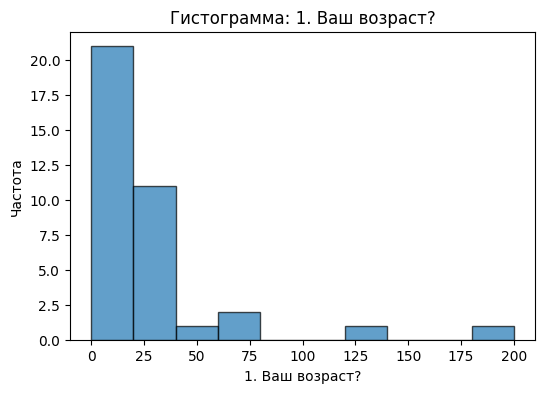

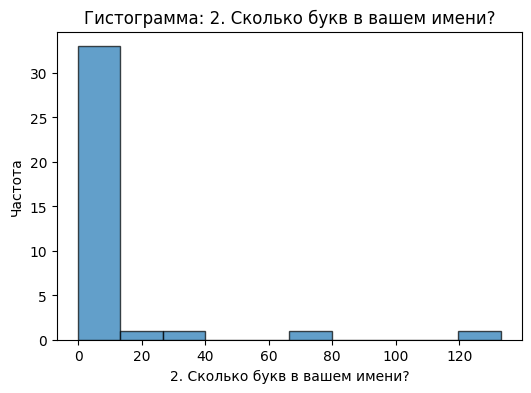

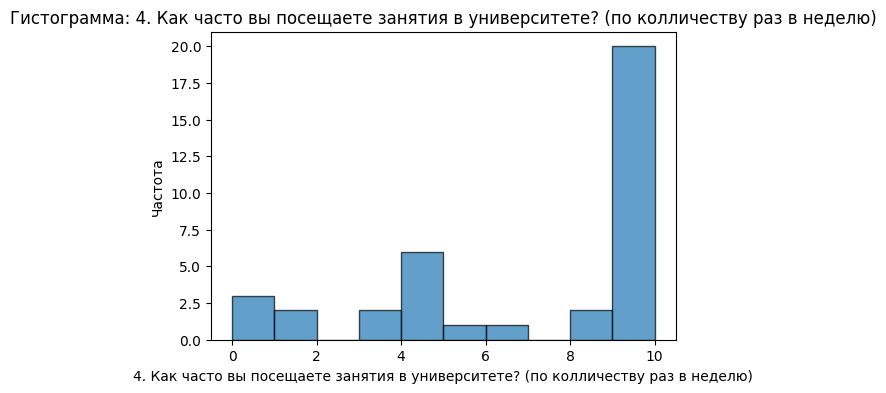

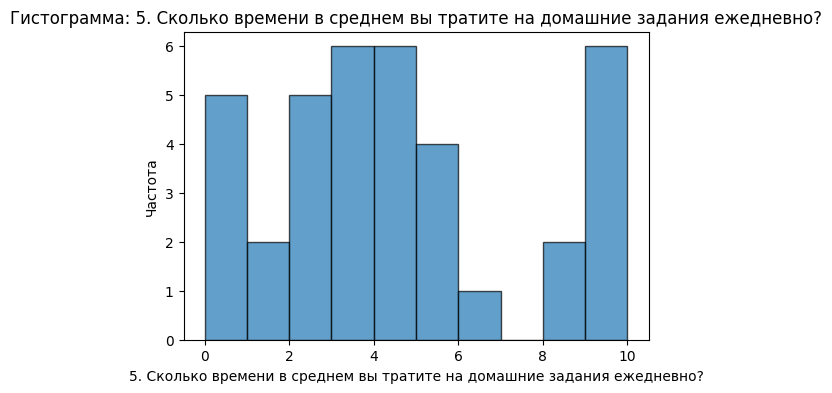

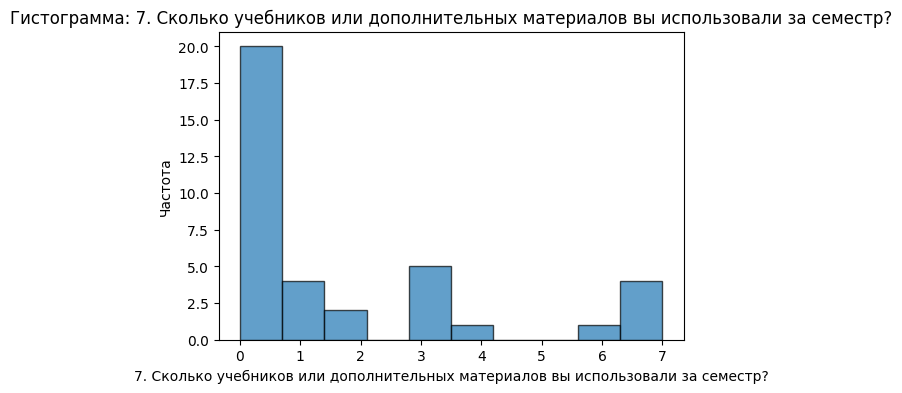

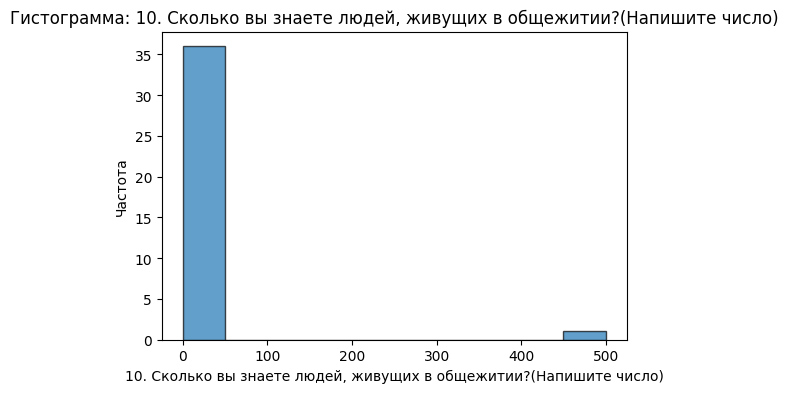

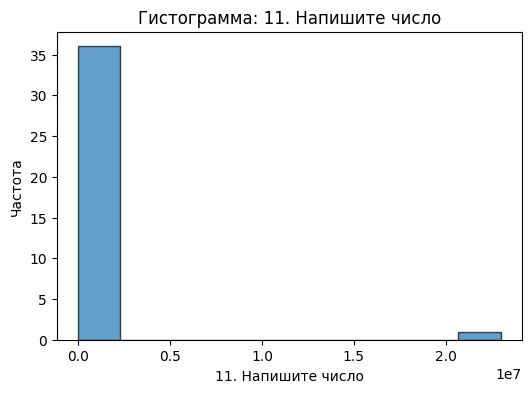

In [4]:
# Ячейка 2: Гистограммы для количественных переменных
import matplotlib.pyplot as plt

for col in quant_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].astype(float), bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

Порядковые переменные:

5. Сколько времени в среднем вы тратите на домашние задания ежедневно?
  Ранги (первые 10 значений):
[21.5 10.   6.5  3.  10.  34.5 30.5 26.5 10.  21.5]


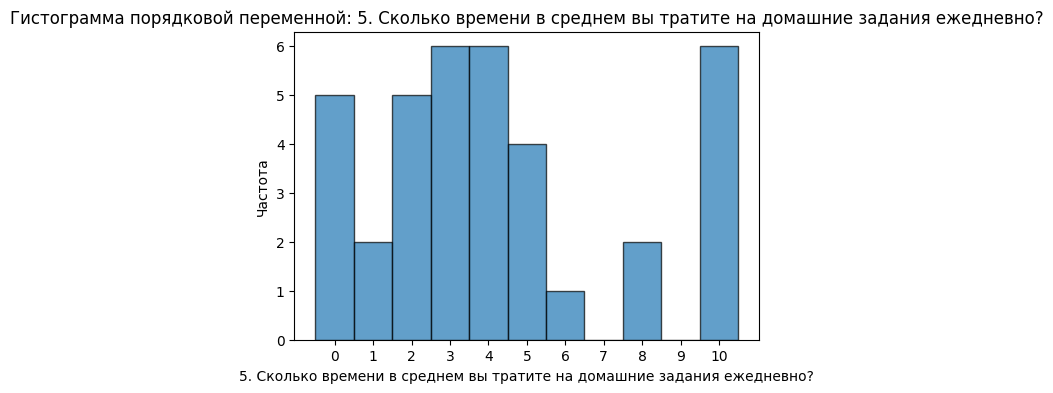


6. Оцените, как вам нравится учиться в университете:
  Ранги (первые 10 значений):
[19.5  5.5  8.  15.   8.  35.  15.  30.  15.  19.5]


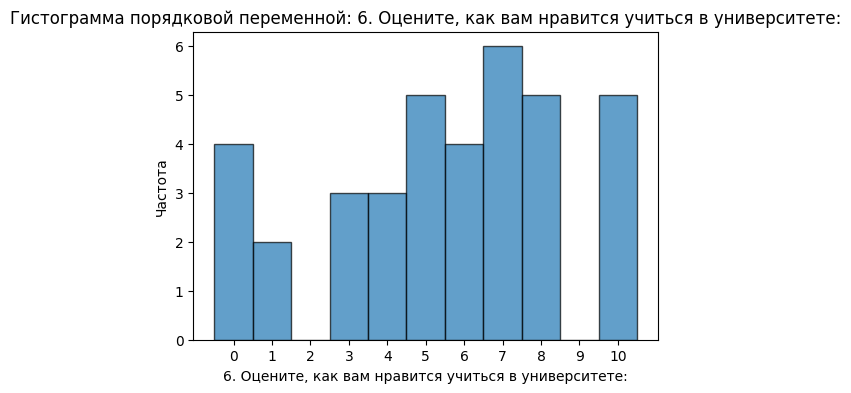

In [5]:
# Ячейка 3: Анализ порядковых переменных
# Предполагаем, что порядковые данные уже выражены числами (например, 1-5)
ordinal_cols = ['5. Сколько времени в среднем вы тратите на домашние задания ежедневно?', 
                '6. Оцените, как вам нравится учиться в университете:']

print("Порядковые переменные:")
for col in ordinal_cols:
    # Вычисляем ранги для каждого наблюдения
    ranks = df[col].rank(method='average')
    print(f"\n{col}\n  Ранги (первые 10 значений):\n{ranks.head(10).values}")
    
    # Гистограмма распределения порядковых ответов
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=np.arange(df[col].min(), df[col].max()+2)-0.5, edgecolor='k', alpha=0.7)
    plt.title(f'Гистограмма порядковой переменной: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.xticks(range(int(df[col].min()), int(df[col].max())+1))
    plt.show()

Качественные переменные:

8. Пользуетесь ли вы университетскими столовыми?
  Мода: Нет


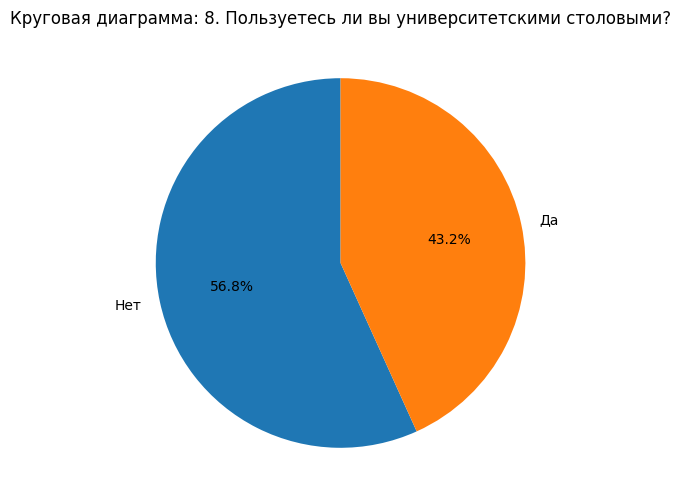


9. Пользовались ли вы электронно-библиотечной системой университета?
  Мода: Нет


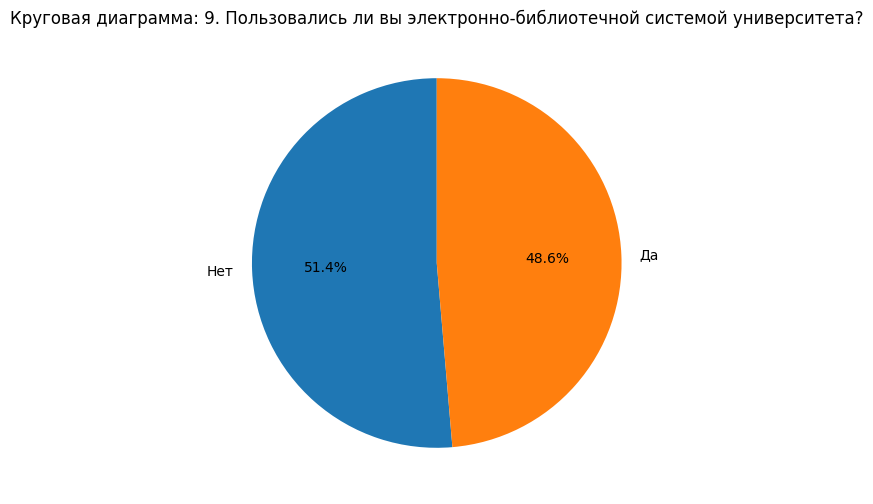


12. Вы любите, когда вам говорят пожалуйста и спасибо?
  Мода: Да


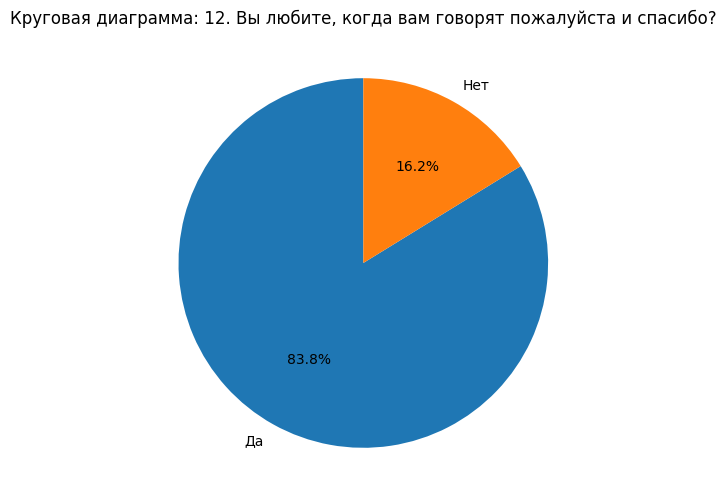


13. Что, по вашем мнению из следующего списка стоит реализовать в университете?
  Мода: Интернет+Розетки


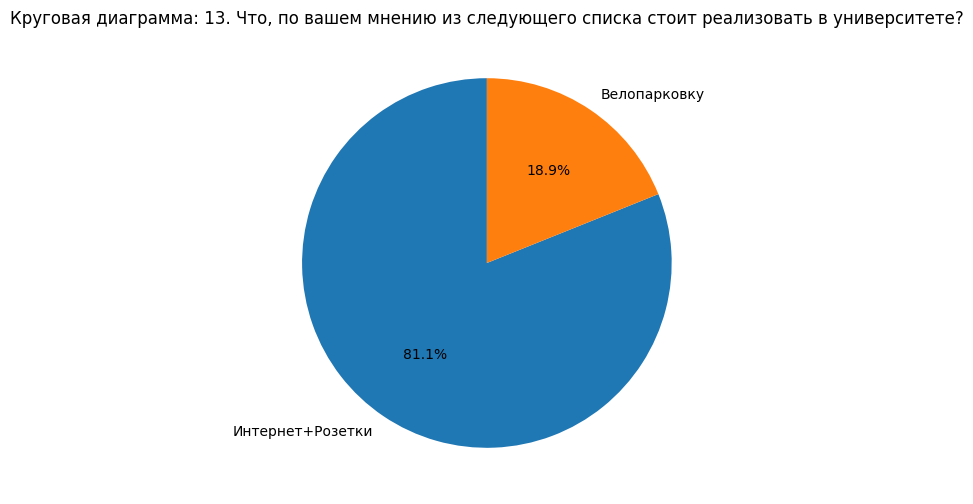


14. Есть ли у вас ноутбук?
  Мода: Да


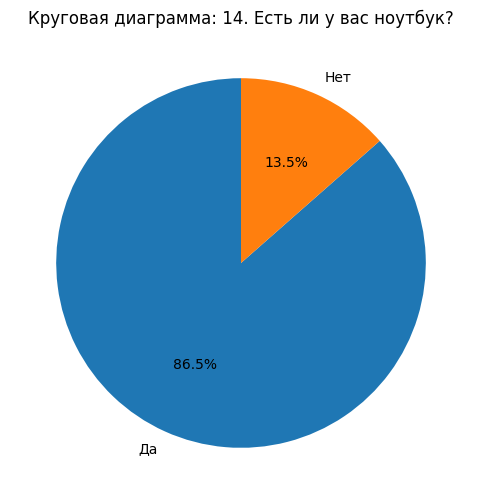


15. Откуда вы получаете расписание занятий?
  Мода: Приложение


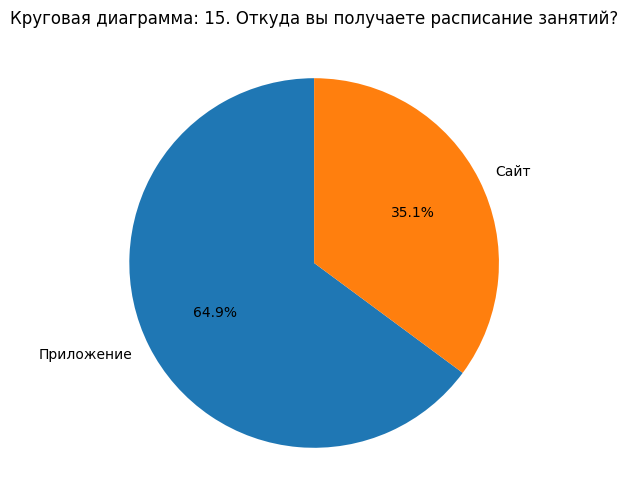

In [6]:
# Ячейка 4: Анализ качественных переменных
qual_cols = ['8. Пользуетесь ли вы университетскими столовыми?', 
             '9. Пользовались ли вы электронно-библиотечной системой университета?', 
             '12. Вы любите, когда вам говорят пожалуйста и спасибо?', 
             '13. Что, по вашем мнению из следующего списка стоит реализовать в университете?', 
             '14. Есть ли у вас ноутбук?', 
             '15. Откуда вы получаете расписание занятий?']

print("Качественные переменные:")
for col in qual_cols:
    # Вычисляем моду
    mode_val = df[col].mode().iloc[0]
    print(f"\n{col}\n  Мода: {mode_val}")
    
    # Строим круговую диаграмму распределения ответов
    counts = df[col].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Круговая диаграмма: {col}')
    plt.show()

In [7]:
# Ячейка 5: Таблицы сопряжённости и оценка связи между парами качественных переменных
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score
import math

# Пара 1: "14. Есть ли у вас ноутбук?" и "12. Вы любите, когда вам говорят пожалуйста и спасибо?"
table1 = pd.crosstab(df['14. Есть ли у вас ноутбук?'], df['12. Вы любите, когда вам говорят пожалуйста и спасибо?'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(table1)
n1 = table1.sum().sum()
cramer_v_1 = math.sqrt(chi2_1 / (n1 * (min(table1.shape)-1)))
phi2_1 = chi2_1 / n1
print("Пара 1:")
print("Таблица сопряженности:\n", table1)
print(f"Chi2: {chi2_1:.2f}, p-value: {p_1:.3f}, Cramer's V: {cramer_v_1:.2f}")

# Пара 2: "8. Пользуетесь ли вы университетскими столовыми?" и "9. Пользовались ли вы электронно-библиотечной системой университета?"
table2 = pd.crosstab(df['8. Пользуетесь ли вы университетскими столовыми?'], df['9. Пользовались ли вы электронно-библиотечной системой университета?'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(table2)
n2 = table2.sum().sum()
cramer_v_2 = math.sqrt(chi2_2 / (n2 * (min(table2.shape)-1)))
phi2_2 = chi2_2 / n2
print("\nПара 2:")
print("Таблица сопряженности:\n", table2)
print(f"Chi2: {chi2_2:.2f}, p-value: {p_2:.3f}, Cramer's V: {cramer_v_2:.2f}")

# Информационный коэффициент (мутуальная информация) для пары 1
mi_1 = mutual_info_score(None, None, contingency=table1.values)
print(f"\nИнформационный коэффициент (Пара 1): {mi_1:.2f}")

# Информационный коэффициент для пары 2
mi_2 = mutual_info_score(None, None, contingency=table2.values)
print(f"Информационный коэффициент (Пара 2): {mi_2:.2f}")

Пара 1:
Таблица сопряженности:
 12. Вы любите, когда вам говорят пожалуйста и спасибо?  Да  Нет
14. Есть ли у вас ноутбук?                                     
Да                                                      29    3
Нет                                                      2    3
Chi2: 4.86, p-value: 0.028, Cramer's V: 0.36

Пара 2:
Таблица сопряженности:
 9. Пользовались ли вы электронно-библиотечной системой университета?  Да  Нет
8. Пользуетесь ли вы университетскими столовыми?                             
Да                                                                    10    6
Нет                                                                    8   13
Chi2: 1.30, p-value: 0.255, Cramer's V: 0.19

Информационный коэффициент (Пара 1): 0.08
Информационный коэффициент (Пара 2): 0.03


In [8]:
# Ячейка 6: Построение логической таблицы (бинаризация) и кластеризация
from sklearn.cluster import KMeans

# Функция для бинаризации: для числовых переменных – по медиане, для качественных – сравнение с модой
def binarize_column(col):
    if pd.api.types.is_numeric_dtype(col):
        med = col.median()
        return col.apply(lambda x: 1 if x > med else 0)
    else:
        mode_val = col.mode().iloc[0]
        return col.apply(lambda x: 1 if x == mode_val else 0)

# Применяем функцию ко всем столбцам (без создания новых столбцов – создаём копию логической таблицы)
logical_df = df.copy()
for col in df.columns:
    logical_df[col] = binarize_column(df[col])

print("Логическая таблица (первые 5 строк):")
display(logical_df.head())

# Кластеризация с использованием KMeans (например, 3 кластера)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(logical_df)
logical_df['Cluster'] = clusters

print("\nРаспределение респондентов по кластерам:")
display(logical_df['Cluster'].value_counts())

# Вывод центров кластеров
print("\nЦентры кластеров (бинарные значения):")
display(pd.DataFrame(kmeans.cluster_centers_, columns=logical_df.columns[:-1]))

Логическая таблица (первые 5 строк):


,1. Ваш возраст?,2. Сколько букв в вашем имени?,3. Ощущаете ли вы себя психологически уравновешанным?,4. Как часто вы посещаете занятия в университете? (по колличеству раз в неделю),5. Сколько времени в среднем вы тратите на домашние задания ежедневно?,"6. Оцените, как вам нравится учиться в университете:",7. Сколько учебников или дополнительных материалов вы использовали за семестр?,8. Пользуетесь ли вы университетскими столовыми?,9. Пользовались ли вы электронно-библиотечной системой университета?,"10. Сколько вы знаете людей, живущих в общежитии?(Напишите число)",11. Напишите число,"12. Вы любите, когда вам говорят пожалуйста и спасибо?","13. Что, по вашем мнению из следующего списка стоит реализовать в университете?",14. Есть ли у вас ноутбук?,15. Откуда вы получаете расписание занятий?
1,0,0,0,1,0,0,1,1,1,0,1,0,1,1,0
2,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1
3,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1
5,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0
6,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0



Распределение респондентов по кластерам:


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
0    13
1    12
2    12
Name: count, dtype: int64


Центры кластеров (бинарные значения):


,1. Ваш возраст?,2. Сколько букв в вашем имени?,3. Ощущаете ли вы себя психологически уравновешанным?,4. Как часто вы посещаете занятия в университете? (по колличеству раз в неделю),5. Сколько времени в среднем вы тратите на домашние задания ежедневно?,"6. Оцените, как вам нравится учиться в университете:",7. Сколько учебников или дополнительных материалов вы использовали за семестр?,8. Пользуетесь ли вы университетскими столовыми?,9. Пользовались ли вы электронно-библиотечной системой университета?,"10. Сколько вы знаете людей, живущих в общежитии?(Напишите число)",11. Напишите число,"12. Вы любите, когда вам говорят пожалуйста и спасибо?","13. Что, по вашем мнению из следующего списка стоит реализовать в университете?",14. Есть ли у вас ноутбук?,15. Откуда вы получаете расписание занятий?
0,0.384615,0.461538,0.230769,0.307692,0.076923,0.000000,0.384615,0.692308,0.538462,0.538462,0.769231,0.692308,0.846154,0.846154,0.384615
1,0.916667,0.416667,0.833333,0.666667,0.500000,0.583333,0.250000,0.583333,0.916667,0.583333,0.333333,0.833333,0.833333,0.916667,1.000000
2,0.000000,0.166667,0.833333,0.250000,0.500000,0.750000,0.750000,0.416667,0.083333,0.333333,0.333333,1.000000,0.750000,0.833333,0.583333


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


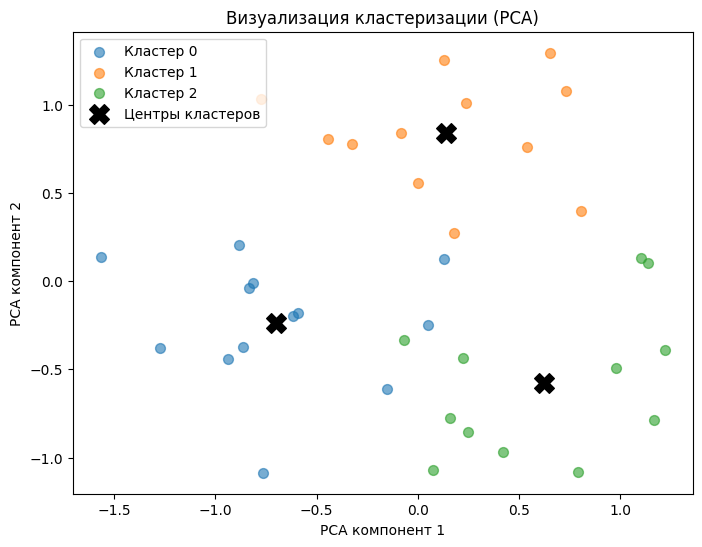

In [9]:
# Ячейка 7: Визуализация кластеризации с использованием PCA для снижения размерности
from sklearn.decomposition import PCA

# Отбрасываем столбец с номерами кластеров для PCA
features = logical_df.drop('Cluster', axis=1)

# Применяем PCA для снижения размерности до 2-х главных компонент
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features)
logical_df['PCA1'] = pca_result[:, 0]
logical_df['PCA2'] = pca_result[:, 1]

# Строим диаграмму рассеяния для кластеров
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in sorted(logical_df['Cluster'].unique()):
    subset = logical_df[logical_df['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Кластер {cluster}', alpha=0.6, s=50)
    
# Вычисляем и отображаем центры кластеров в пространстве PCA
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='X', s=200, c='black', label='Центры кластеров')

plt.title('Визуализация кластеризации (PCA)')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.legend()
plt.show()